<a href="https://colab.research.google.com/github/Avvicii/MLEE-assignment/blob/main/LOS_NLOS_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/ewine-project/UWB-LOS-NLOS-Data-Set/refs/heads/master/dataset/uwb_dataset_part3.csv'
df = pd.read_csv(url)

In [3]:
x = df.drop('NLOS', axis=1)
y = df['NLOS']
x

,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,...,CIR1006,CIR1007,CIR1008,CIR1009,CIR1010,CIR1011,CIR1012,CIR1013,CIR1014,CIR1015
0,1.55,748.0,6420.0,16451.0,17547.0,140.0,24574.0,2389.0,423.0,2.0,...,549.0,396.0,435.0,734.0,287.0,709.0,331.0,477.0,475.0,512.0
1,1.70,750.0,5108.0,17155.0,15112.0,48.0,9370.0,861.0,377.0,2.0,...,247.0,25.0,186.0,204.0,133.0,242.0,312.0,133.0,178.0,0.0
2,3.20,748.0,8205.0,18229.0,15285.0,44.0,6178.0,927.0,338.0,2.0,...,95.0,310.0,207.0,166.0,325.0,261.0,175.0,251.0,248.0,0.0
3,7.61,743.0,1236.0,3770.0,3473.0,72.0,8435.0,1088.0,1025.0,2.0,...,269.0,172.0,241.0,92.0,500.0,269.0,150.0,477.0,175.0,256.0
4,1.59,751.0,8751.0,12775.0,9275.0,68.0,10258.0,1535.0,281.0,2.0,...,208.0,344.0,287.0,143.0,288.0,230.0,253.0,218.0,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,4.80,732.0,465.0,1094.0,1530.0,72.0,1826.0,1083.0,1024.0,2.0,...,193.0,209.0,491.0,195.0,231.0,517.0,443.0,289.0,558.0,0.0
5996,5.14,746.0,5706.0,5000.0,4192.0,76.0,2429.0,1143.0,1024.0,2.0,...,425.0,437.0,452.0,180.0,278.0,515.0,263.0,406.0,160.0,256.0
5997,0.27,747.0,16719.0,17321.0,12131.0,88.0,11430.0,2219.0,268.0,2.0,...,240.0,60.0,97.0,83.0,270.0,100.0,245.0,62.0,33.0,0.0
5998,1.28,749.0,18019.0,18180.0,14119.0,68.0,9090.0,1798.0,266.0,2.0,...,93.0,93.0,306.0,152.0,178.0,78.0,50.0,251.0,40.0,256.0


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [5]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
pca = PCA(n_components=0.88)
pca.fit(x_train_scaled)

PCA(n_components=0.88)

In [7]:
x_train_pca = pca.transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [8]:
model = Sequential([
    Input(shape=(x_train_pca.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        40,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,689 (166.75 KB)

 Trainable params: 42,689 (166.75 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(x_train_pca, y_train, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7363 - loss: 0.5267 - val_accuracy: 0.8125 - val_loss: 0.4058
Epoch 2/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9142 - loss: 0.2394 - val_accuracy: 0.8208 - val_loss: 0.4415
Epoch 3/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9543 - loss: 0.1340 - val_accuracy: 0.8062 - val_loss: 0.5224
Epoch 4/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9850 - loss: 0.0602 - val_accuracy: 0.8125 - val_loss: 0.7443
Epoch 5/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9969 - loss: 0.0156 - val_accuracy: 0.7854 - val_loss: 0.9740
Epoch 6/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.7875 - val_loss: 1.0941
Epoch 7/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.7875 - val_loss: 1.1801
Epoch 8/30
270/270 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 6.9417e-04 - val_accuracy

In [10]:
y_pred = (model.predict(x_test_pca) > 0.5).astype(int)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.815
F1-score: 0.8096054888507719
Confusion matrix:
 [[506  90]
 [132 472]]


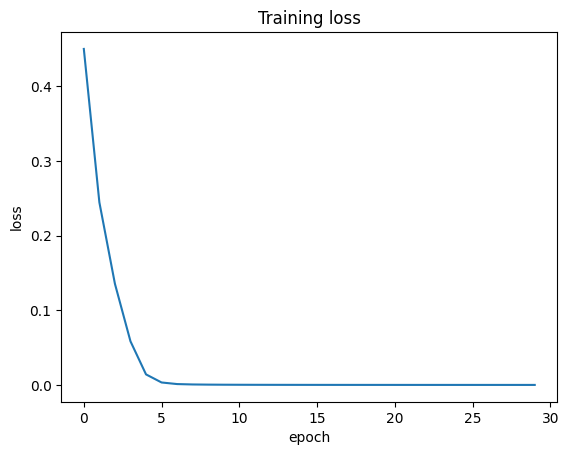

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.title("Training loss")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()